<a href="https://colab.research.google.com/github/suryamandavilli/Echo_Sentiment_Analysis/blob/master/Sent_analy_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import nltk

In [ ]:
df_review = pd.read_csv('alexa_rev.tsv', sep='\t')

In [ ]:
df_review.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df_review.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df_review.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
# Adding a new col 'Length' so that we will have the first parameter for comparison
df_review['length'] = df_review['verified_reviews'].apply(len) 
df_review.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


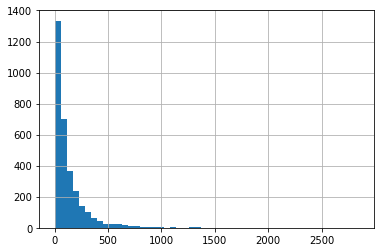

In [ ]:
df_review['length'].hist(bins=50)

In [ ]:
df_review['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [ ]:
# Since we have the lengthiest review at 2851 characters we shall view this message first.

In [ ]:
df_review[df_review['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee93e3ef0>,
      dtype=object)

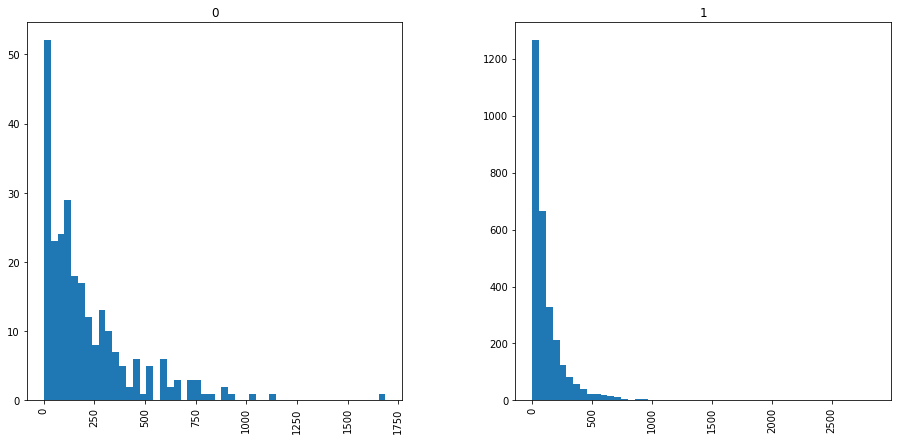

In [ ]:
df_review.hist(column = 'length', by = 'feedback', bins =50, figsize=(15,7))

In [ ]:
df = pd.read_csv('alexa_rev.tsv', delimiter='\t', quoting=3)

In [ ]:
# Now we start the text cleaning

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
for i in range(0,3150):
    review = re.sub('a-zA-Z', '', df['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
# Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1500)

In [ ]:
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = df.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[ 15,  39],
       [  1, 575]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr = classification_report(y_pred, y_test)

In [ ]:
cr

'              precision    recall  f1-score   support\n\n           0       0.94      0.28      0.43        54\n           1       0.94      1.00      0.97       576\n\n    accuracy                           0.94       630\n   macro avg       0.94      0.64      0.70       630\nweighted avg       0.94      0.94      0.92       630\n'

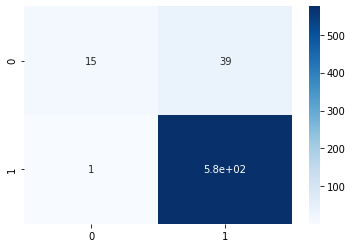

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report = classification_report(y_pred, y_test)

In [ ]:
cr1 = classification_report(y_pred, y_test, output_dict = True)

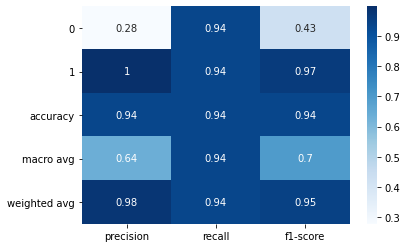

In [ ]:
sns.heatmap(pd.DataFrame(cr1).iloc[:-1, :].T, annot=True, cmap='Blues')